In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, Excel file I/O (e.g. pd.read_excel)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', 50)
pd.options.display.max_rows = 999

In [19]:
xls = pd.ExcelFile('./Balance1.xlsx')
df_paquetes = pd.read_excel(xls, 'paquetes')
df_periodosrecetas = pd.read_excel(xls, 'periodosrecetas')
df_pr_razones = pd.read_excel(xls, 'pr_razones')
#df_prospectos = pd.read_excel(xls, 'prospectos')
df_pacientes = pd.read_excel(xls, 'pacientes')


In [21]:
df_dictionary = pd.read_excel('./DataDictionary.xlsx','Aggre')
df_paquetes_columns = df_paquetes.columns
df_periodosrecetas_columns = df_periodosrecetas.columns
df_pr_razones_columns = df_pr_razones.columns
df_prospectos_columns =  df_prospectos.columns
dict_dictionary = dict(zip(df_dictionary['Field'], df_dictionary['Description']))

In [29]:
df_paquetes_list = []
df_periodosrecetas_list = []
df_pr_razones_list = []
df_pacientes_list = []

for i in range(len(df_paquetes_columns)):
    if df_paquetes_columns[i] in dict_dictionary.keys():
                    df_paquetes_list.append(dict_dictionary.get(df_paquetes_columns[i]))
    else:
        df_paquetes_list.append(df_paquetes_columns[i])

for i in range(len(df_periodosrecetas_columns)):
    if df_periodosrecetas_columns[i] in dict_dictionary.keys():
                    df_periodosrecetas_list.append(dict_dictionary.get(df_periodosrecetas_columns[i]))
    else:
        df_periodosrecetas_list.append(df_periodosrecetas_columns[i])
            
for i in range(len(df_pr_razones_columns)):
    if df_pr_razones_columns[i] in dict_dictionary.keys():
                    df_pr_razones_list.append(dict_dictionary.get(df_pr_razones_columns[i]))
    else:
        df_pr_razones_list.append(df_pr_razones_columns[i])
            
for i in range(len(df_pacientes.columns)):
    if df_pacientes.columns[i] in dict_dictionary.keys():
                    df_pacientes_list.append(dict_dictionary.get(df_pacientes.columns[i]))
    else:
        df_pacientes_list.append(df_pacientes.columns[i])
        
df_paquetes.columns = df_paquetes_list
df_periodosrecetas.columns = df_periodosrecetas_list
df_pr_razones.columns = df_pr_razones_list 
df_pacientes.columns = df_pacientes_list

In [23]:
print(df_paquetes.shape)
df_paquetes.isnull().sum(axis = 0).sort_values()
print(df_paquetes.head())

(11, 6)
   Patient Membership package    Descripcion  Order  DescripcionVE  ActivoVE  \
0                           1     PREVENTIVA     10     Preventivo         1   
1                           2       INTEGRAL     20  Integral Plus         0   
2                           3  INTEGRAL PLUS     30  Integral Plus         1   
3                           4       INFANTIL     40            NaN         0   
4                           5           OTRO     50            NaN         0   

   ActivoBAL  
0          1  
1          0  
2          1  
3          0  
4          0  


In [24]:
print(df_periodosrecetas.shape)
df_periodosrecetas.isnull().sum(axis = 0).sort_values()
print(df_periodosrecetas.head())

(32, 2)
   IdPeriodo Descripcion
0          1   Por 1 día
1          2  Por 2 días
2          3  Por 3 días
3          4  Por 4 días
4          5  Por 5 días


In [25]:
print(df_pr_razones.shape)
df_pr_razones.isnull().sum(axis = 0).sort_values()
print(df_pr_razones.head())

(6, 2)
   IdRazonPR                       Descripcion
0          1       Me mandan mucha información
1          2        No me interesa el Programa
2          3       No tengo a quien recomendar
3          4          No me lo explicaron bien
4          5  Mala experiencia con el programa


In [30]:
print(df_pacientes.shape)
df_pacientes.isnull().sum(axis = 0).sort_values()


(14855, 18)


Patient ID                  0
Branch id                   0
RecordarCita                0
ProgramaRecomendados        0
Create Date                 0
Create Time                 0
IdInteresado                0
YearBirth                  42
State                      43
Town                       48
Sex                       141
Marital status            207
Social Security           367
Ocupacion                 619
Religion                 9669
Scholarship              9779
EstadioValor            11154
Estadio                 11154
dtype: int64

In [31]:
#We decide to delete columns with more than 50% of missing values.
df_pacientes = df_pacientes.drop(columns=['Estadio'])
df_pacientes = df_pacientes.drop(columns=['EstadioValor'])
df_pacientes = df_pacientes.drop(columns=['Scholarship'])
df_pacientes = df_pacientes.drop(columns=['Religion'])

#Fill NA in numeric columns to be the median 
df_pacientes = df_pacientes.fillna(df_pacientes.median())
#Impute categorical variables by filling with most occurring class
df_pacientes = df_pacientes.apply(lambda x: x.fillna(x.value_counts().index[0]))

<ipython-input-31-ed8985ea4036>:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_pacientes = df_pacientes.fillna(df_pacientes.median())


In [32]:
#Shape after removing all the missing columns > 50%
print(df_pacientes.shape)
print(df_pacientes.isnull().sum(axis = 0).sort_values())
print(df_pacientes.head())

(14855, 14)
Patient ID              0
YearBirth               0
Branch id               0
Town                    0
State                   0
Sex                     0
Marital status          0
Ocupacion               0
Create Date             0
Create Time             0
IdInteresado            0
ProgramaRecomendados    0
Social Security         0
RecordarCita            0
dtype: int64
   Patient ID  YearBirth  Branch id       Town       State Sex Marital status  \
0           1     1928.0          1  GUADALUPE  NUEVO LEÓN   H       SOLTERÍA   
1           2     1971.0          1  GUADALUPE  NUEVO LEÓN   H     MATRIMONIO   
2           3     1943.0          1  GUADALUPE  NUEVO LEÓN   M     MATRIMONIO   
3           4     1976.0          1   SANTIAGO  NUEVO LEÓN   H       SOLTERÍA   
4           5     1958.0          1  GUADALUPE  NUEVO LEÓN   H     MATRIMONIO   

               Ocupacion Create Date Create Time  IdInteresado  \
0                ALBAÑIL  2013-02-19    13:55:23         1

#Q1: Each team should create ten hypotheses to test about relationships between potential predictors and 
#diabetes patient engagement. An example might be that patients who live close to a clinic 
#are more likely to be highly engaged in their treatment.


1. Age: Different group of age might constitute different conceptions toward the diabetes treatment and hence create different engagement level.
2. Occupation: Different occupations might impact the hours/available time to stay engaged with the treatment / patients higher-paying occupation might be more concered about their health and they are more engaged than patients with lower income group.
3. Sex: Certain types of engagements migth bemore effective than women than for  men or vice versa.
4. Town, State: Distance from clinic like city and state might be a barrier to keep staying high engagement with patients. 
5. Interest: Interest towards any engagement activity might be useful to predict which intervention is more effective than others.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14855 entries, 0 to 14854
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient ID            14855 non-null  int64         
 1   YearBirth             14855 non-null  float64       
 2   Branch id             14855 non-null  int64         
 3   Town                  14855 non-null  object        
 4   State                 14855 non-null  object        
 5   Sex                   14855 non-null  object        
 6   Marital status        14855 non-null  object        
 7   Ocupacion             14855 non-null  object        
 8   Create Date           14855 non-null  datetime64[ns]
 9   Create Time           14855 non-null  object        
 10  IdInteresado          14855 non-null  int64         
 11  ProgramaRecomendados  14855 non-null  int64         
 12  Social Security       14855 non-null  object        
 13  RecordarCita    

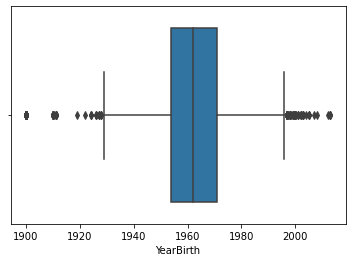

In [34]:
#Q2 Profiling should include at a minimum the number of records in a file, the fields in a record, and for each field, 
#the format of the data, units, the range of values, and summary statistics for numeric data. 
#You should create some data visualizations to understand the range of values and spot outliers

df_pacientes.info()
print(df_pacientes.describe())
sns.boxplot(x=df_pacientes["YearBirth"])
#There is one outlier in the YearBirth variable with YearBirt = 1900, we decide to remove that from our dataset.
df_pacientes = df_pacientes[df_pacientes["YearBirth"] != 1900]

AxesSubplot(0.125,0.125;0.775x0.755)


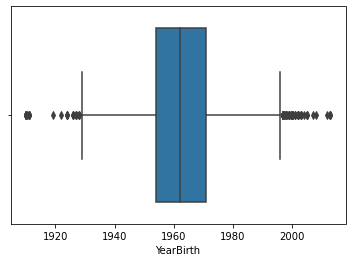

In [38]:
#Check any outlier for "YearBirth"
print(sns.boxplot(x=df_pacientes["YearBirth"]))
df_filtered_pacientes = df_pacientes[np.abs(df_pacientes["YearBirth"]-df_pacientes["YearBirth"].mean()) <= (3*df_pacientes["YearBirth"].std())] 

AxesSubplot(0.125,0.125;0.775x0.755)


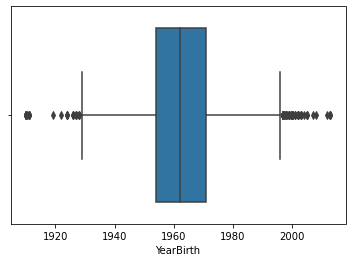

In [40]:
#After removing extreme large values > 3SD
print(sns.boxplot(x=df_pacientes["YearBirth"]))

<AxesSubplot:>

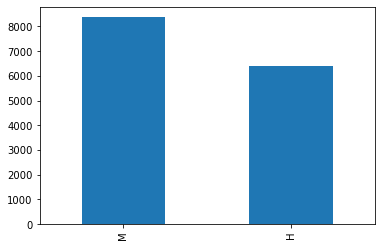

In [41]:
#Histobram for Sex
df_filtered_pacientes['Sex'].value_counts().plot(kind='bar')
#Comments: More Male patients than Female patients

<AxesSubplot:>

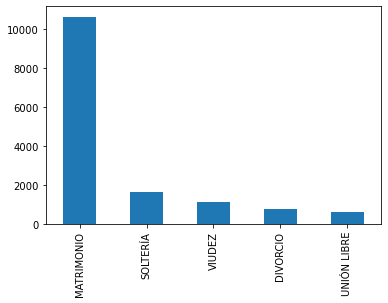

In [42]:
#Histrobram for Marital status
df_filtered_pacientes['Marital status'].value_counts().plot(kind='bar')

#Matrimonio -> Married from majroity of the people

<AxesSubplot:>

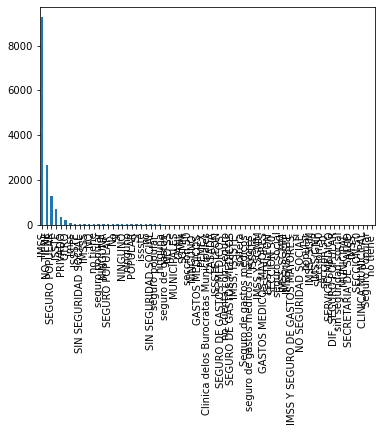

In [46]:
#Histrobram for Social Security
df_filtered_pacientes['Social Security'].value_counts().plot(kind='bar')

#The frequencies of few categories way more higher than others. 

In [47]:
df_filtered_pacientes.groupby('Social Security')['Social Security'].count().sort_values(ascending=False)
#Most patients social security status are: IMSS, NO TIENE, SEGURO POPULAR

Social Security
IMSS                                    9257
NO TIENE                                2682
SEGURO POPULAR                          1271
ISSTE                                    708
PRIVADO                                  320
OTRO                                     210
imss                                      48
ISSSTE                                    39
SIN SEGURIDAD SOCIAL                      33
IMSSS                                     28
NO                                        19
no tiene                                  17
seguro popular                            14
NINGUNA                                   14
SEGURO POPULAR                            12
No                                         9
SI                                         6
ninguno                                    5
NINGUNO                                    5
issste                                     4
POPULAR                                    4
Si                                     

<AxesSubplot:>

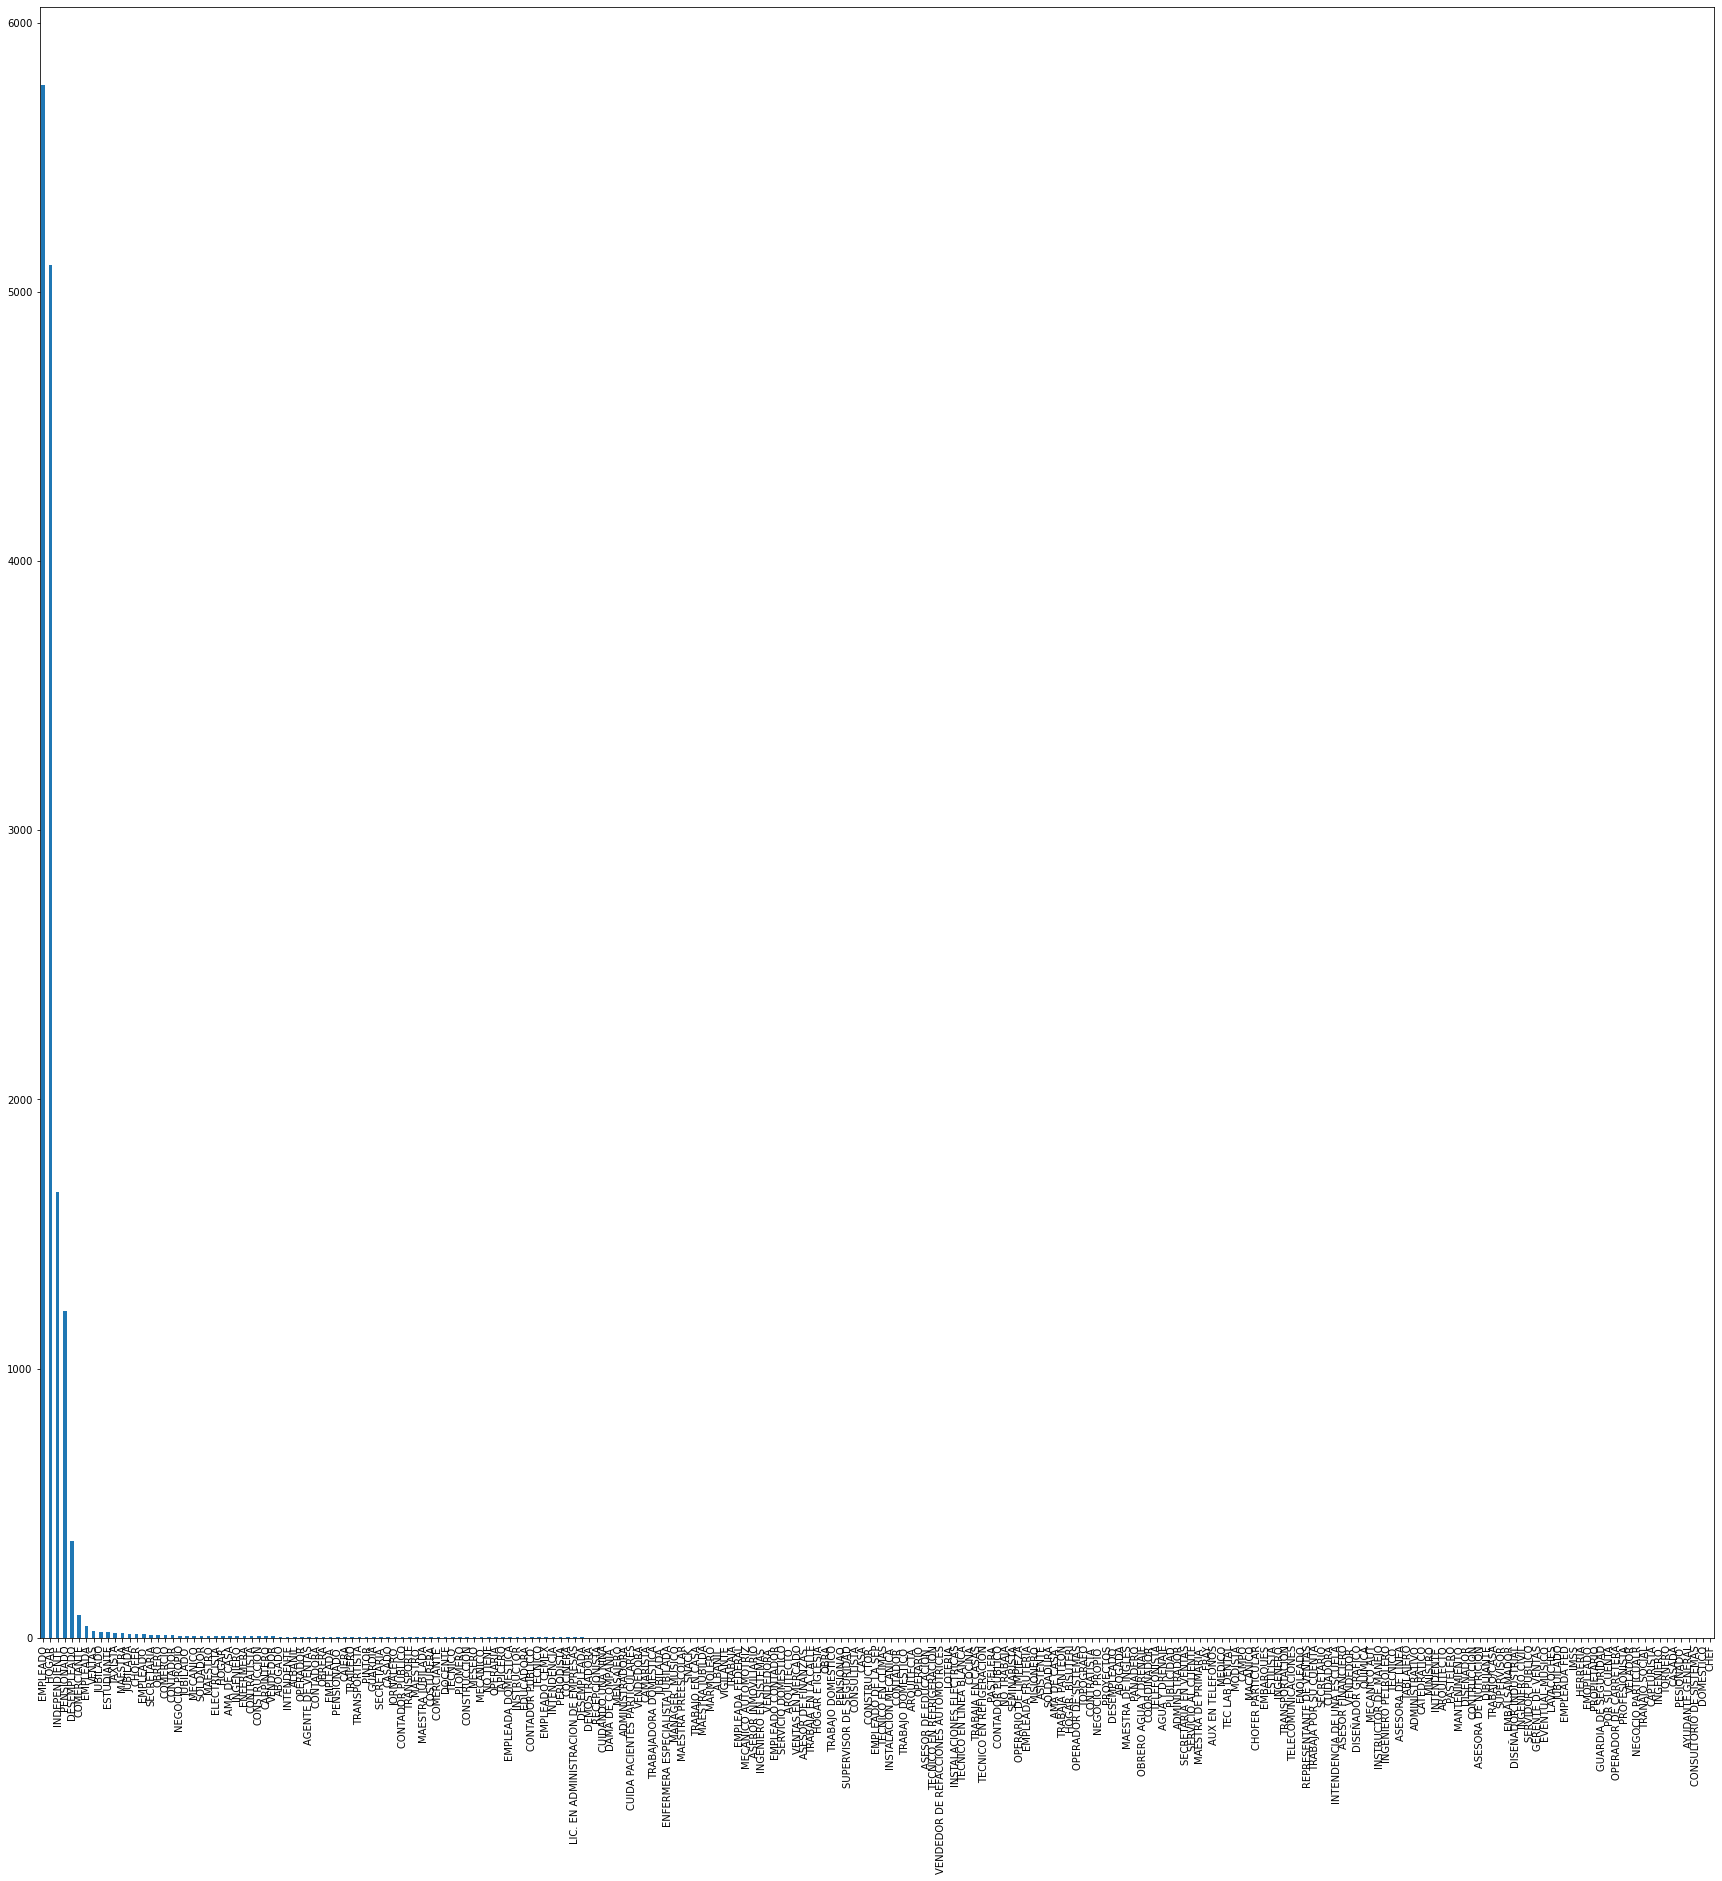

In [43]:
#Histobram for Ocupacion
fig, ax = plt.subplots(figsize=(30, 30))
df_filtered_pacientes['Ocupacion'].value_counts().plot(kind='bar')

#Comments: Few occupations are way more higher than other.

In [44]:
df_filtered_pacientes.groupby('Ocupacion')['Ocupacion'].count().sort_values(ascending=False)
#Top 4 occpuations for patients: HOGAR, EMPLEADO, INDEPENDIENTE, PENSIONADO

Ocupacion
EMPLEADO                                5770
HOGAR                                   5099
INDEPENDIENTE                           1657
PENSIONADO                              1213
DESEMPLEADO                              361
COMERCIANTE                               86
EMPLEADA                                  44
VENTAS                                    26
JUBILADO                                  22
ESTUDIANTE                                20
TAXISTA                                   19
MAESTRA                                   18
JUBILADA                                  15
CHOFER                                    14
EMPLEADO                                  13
SECRETARIA                                12
OBRERO                                    11
COMERCIO                                   9
CONTADOR                                   9
NEGOCIO PROPIO                             8
JUBILADO                                   8
MAESTRO                                    7


In [45]:
#Group by Town, State and have diabetes
df_filtered_pacientes.groupby(['Town','State'])['Patient ID'].count().sort_values(ascending=False)

#Most patients are from NUEVO LEÓN: MONTERREY, GUADALUPE, APODACA, SANTA CATARINA (~50%)

Town                                 State               
MONTERREY                            NUEVO LEÓN              3176
GUADALUPE                            NUEVO LEÓN              2654
APODACA                              NUEVO LEÓN              1438
SANTA CATARINA                       NUEVO LEÓN              1438
SAN NICOLÁS DE LOS GARZA             NUEVO LEÓN               931
GENERAL ESCOBEDO                     NUEVO LEÓN               737
ESCOBEDO                             NUEVO LEÓN               613
JUÁREZ                               NUEVO LEÓN               439
MONTERREY                            NUEVO LEÓN               343
SAN NICOLAS                          NUEVO LEÓN               329
GARCÍA                               NUEVO LEÓN               266
JUAREZ                               NUEVO LEÓN               253
SANTA CATARINA                       NUEVO LEÓN               199
SAN PEDRO                            NUEVO LEÓN               162
SAN PEDRO GARZA GA

In [20]:
#Q3  Skips appointment, from the input file Balance – Tablas (Parte 1)
#Cancels appointment, from the input file Balance – Tablas (Parte 1)
#Reschedules appointment, from the input file Balance – Tablas (Parte 1)



In [51]:
#Q4 Demographics, from the input files Balance – Tablas (Parte 1). For example marital status could be derived from EstadoCivil
#Geography, from the input files Balance – Tablas (Parte 1). For example,
#distance from clinic is dependent on city and state which are in Ciudad and Estado respectively

#Demographics: Patient ID , Sex, YearBirth, Marital status, Ocupacion
patient_demographics = df_filtered_pacientes[['Patient ID','Sex', 'YearBirth' , 'Marital status' , 'Ocupacion']]   
patient_demographics.to_csv("patient_demographics.csv")
#Geography: Patient ID ,'Town','State'
patient_geography = df_filtered_pacientes[['Patient ID','Town', 'State']]   
patient_geography.to_csv("patient_geography.csv")



In [54]:
#Demographics
print(patient_demographics.describe())
print(patient_demographics.head(n = 10))
#Geography
print(patient_geography.describe())
print(patient_geography.head(n = 10))

         Patient ID     YearBirth
count  14773.000000  14773.000000
mean    7637.252352   1962.465308
std     4312.153994     12.243124
min        1.000000   1926.000000
25%     3942.000000   1954.000000
50%     7663.000000   1962.000000
75%    11365.000000   1971.000000
max    15068.000000   2000.000000
   Patient ID Sex  YearBirth Marital status              Ocupacion
0           1   H     1928.0       SOLTERÍA                ALBAÑIL
1           2   H     1971.0     MATRIMONIO  INSTALACION MECANICA 
2           3   M     1943.0     MATRIMONIO                  HOGAR
3           4   H     1976.0       SOLTERÍA               EMPLEADO
4           5   H     1958.0     MATRIMONIO                 CASADO
5           6   H     1957.0       SOLTERÍA               EMPLEADO
6           7   M     1958.0     MATRIMONIO        MAESTRA JUBILDA
7           8   M     1977.0     MATRIMONIO              ESTILISTA
8           9   M     1952.0     MATRIMONIO                  HOGAR
9          10   M     19